# Assignment 8
Linda Koine, Jens Weimann, Markus Wiktorin

## 1

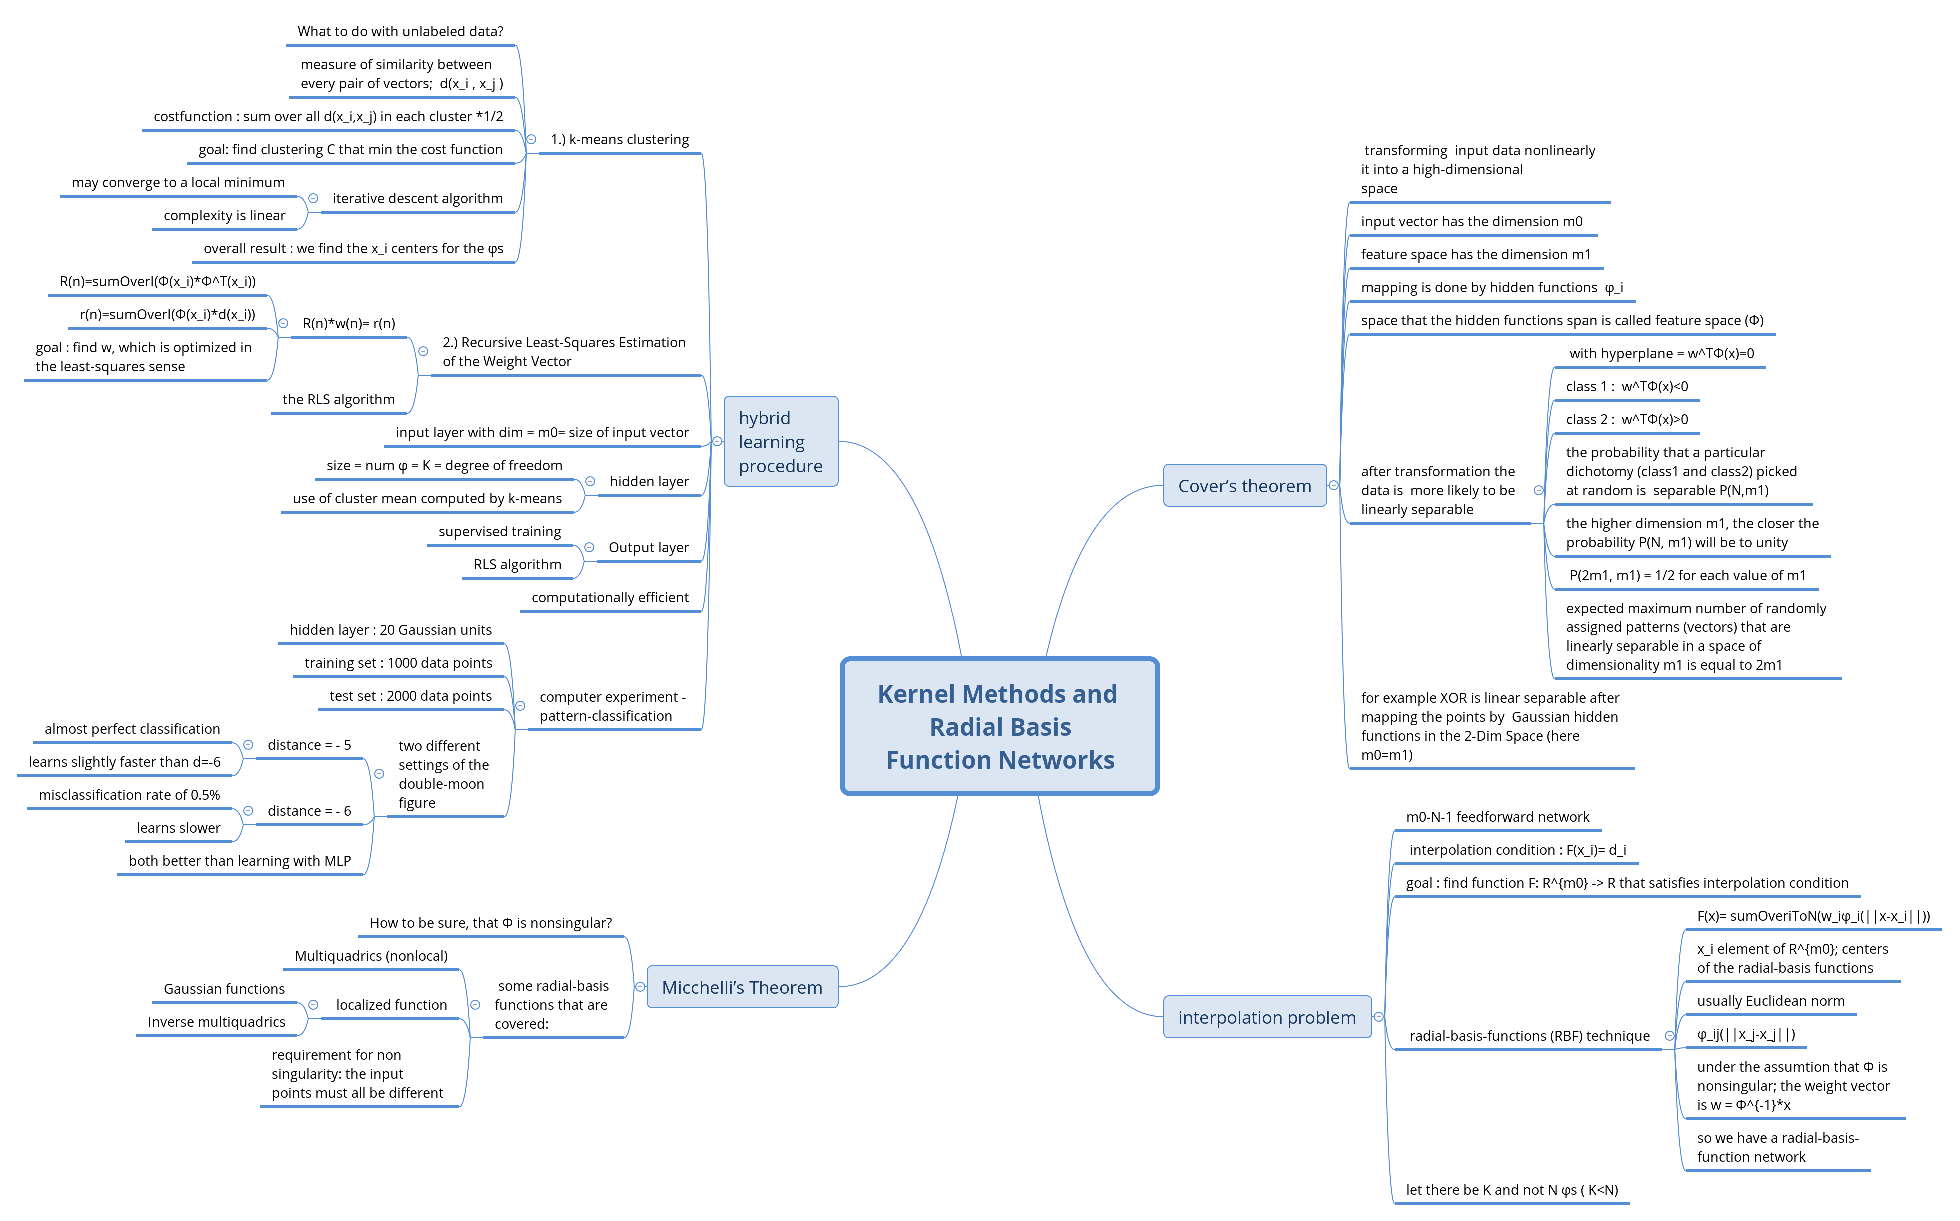

In [109]:
from IPython.display import Image
Image("Radial_Basis_Function_Networks.png")

## 2

In [110]:
import neurolab as nl
import numpy as np
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
class MoonPair:
    def __init__(self, r, w, d, noise_probability=0):
        self.r = r
        self.w = w
        self.d = d
        self.noise_probability = noise_probability
        
    def get_region_a_point(self, sure=False):
        if not sure and np.random.rand() < self.noise_probability:
            return self.get_region_b_point(True)
        while True:
            point = np.array([np.random.rand() * (self.r + self.w/2) * 2 - (self.r + self.w/2),
                              np.random.rand() * (self.r + self.w/2)])
            norm = np.linalg.norm(point)
            if norm < self.r + self.w/2 and norm > self.r - self.w/2:
                return point
            
    def get_region_b_point(self, sure=False):
        if not sure and np.random.rand() < self.noise_probability:
            return self.get_region_a_point(True)
        while True:
            point = np.array([np.random.rand() * (self.r + self.w/2) * 2 - self.w/2,
                              -np.random.rand() * (self.r + self.w/2) - self.d])
            norm = np.linalg.norm(point - np.array([self.r, -self.d]))
            if norm < self.r + self.w/2 and norm > self.r - self.w/2:
                return point
            
    def print_pair(self):
        points_a = []
        points_b = []
        for i in range(1000):
            points_a.append(self.get_region_a_point())
            points_b.append(self.get_region_b_point())

        points_a = np.array(points_a)
        points_b = np.array(points_b)
        plt.figure()
        plt.axis('equal')
        plt.title("r = " + str(self.r) + ", w = " + str(self.w) + \
                  ", d = " + str(self.d) + ", noise = " + str(self.noise_probability))
        plt.scatter(points_a[:,0], points_a[:,1])
        plt.scatter(points_b[:,0], points_b[:,1])
        plt.legend(["A", "B"])
        plt.show()
        
    def generate_sample_set(self, size, sure=False):
        sample = []
        for i in range(round(size / 2)):
            sample.append(np.hstack((self.get_region_a_point(sure))))
            sample.append(np.hstack((self.get_region_b_point(sure))))
        return np.array(sample)
    

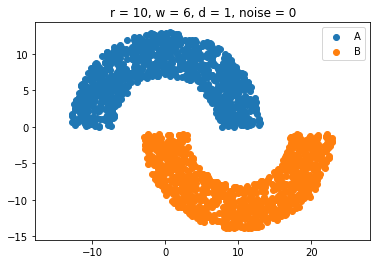

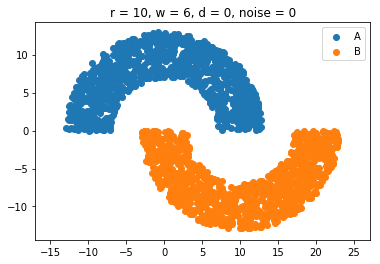

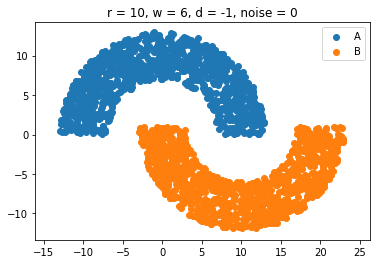

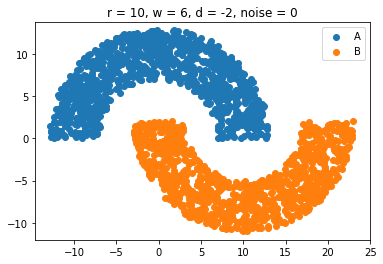

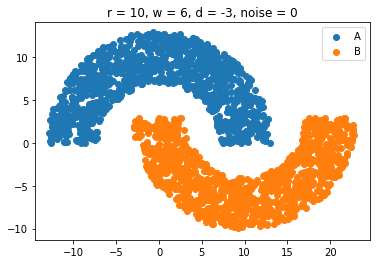

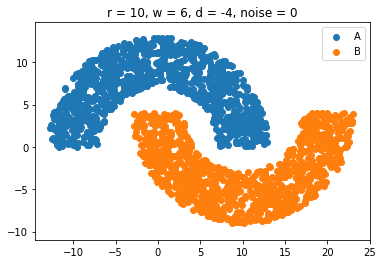

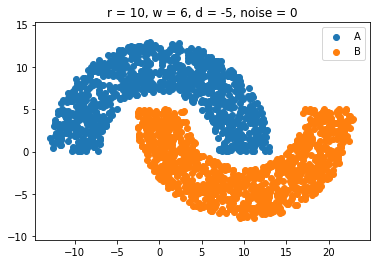

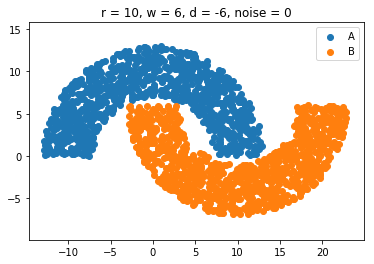

In [112]:
train_size = 1000
test_size = 2000

cases = []
cases.append(MoonPair(10, 6, 1))
cases.append(MoonPair(10, 6, 0))
cases.append(MoonPair(10, 6, -1))
cases.append(MoonPair(10, 6, -2))
cases.append(MoonPair(10, 6, -3))
cases.append(MoonPair(10, 6, -4))
cases.append(MoonPair(10, 6, -5))
cases.append(MoonPair(10, 6, -6))

cases[0].print_pair()
cases[1].print_pair()
cases[2].print_pair()
cases[3].print_pair()
cases[4].print_pair()
cases[5].print_pair()
cases[6].print_pair()
cases[7].print_pair()

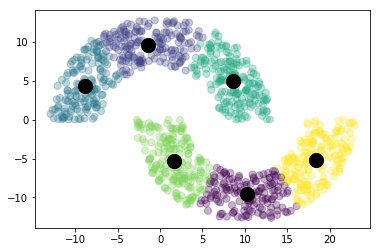

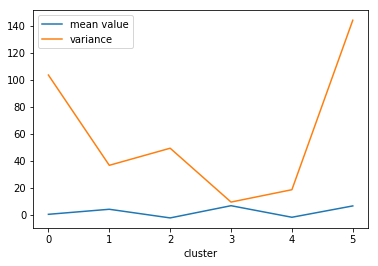

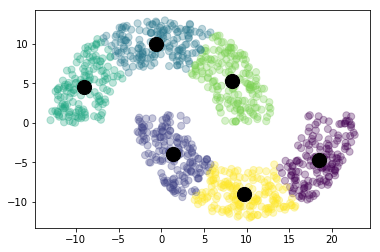

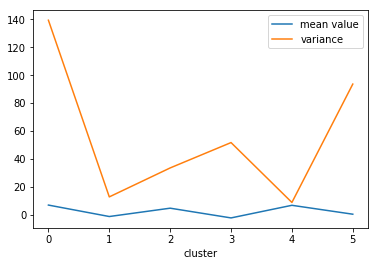

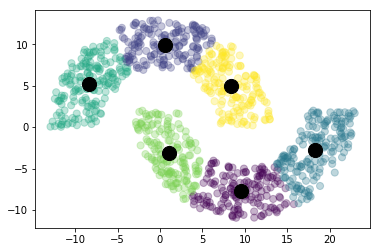

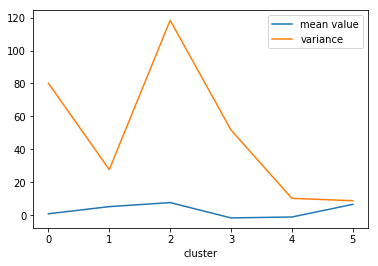

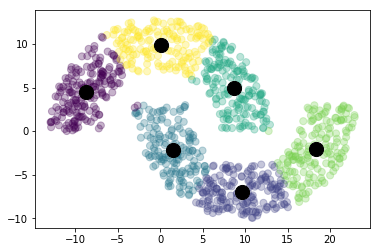

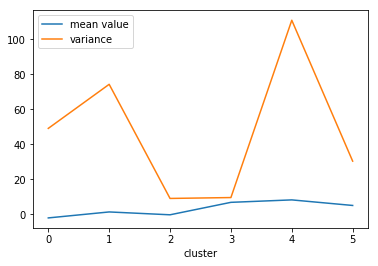

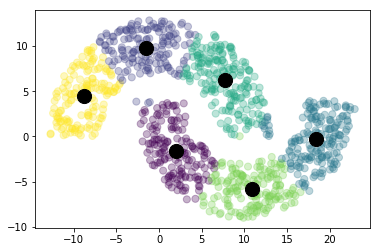

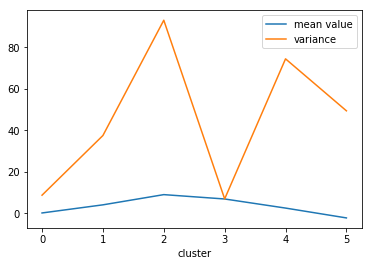

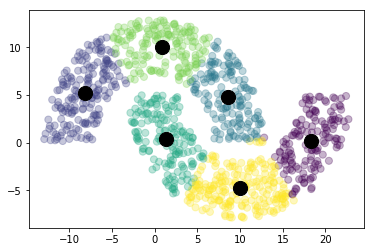

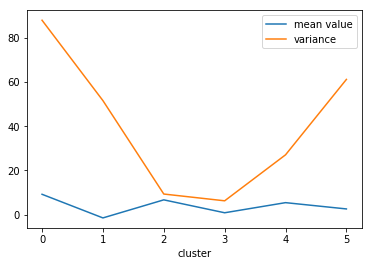

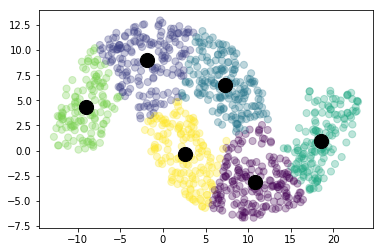

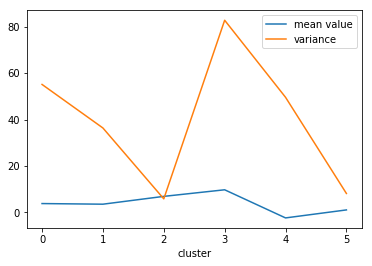

In [113]:
from sklearn.cluster import KMeans

for i in range(1,8):
    Y = cases[i].generate_sample_set(1000)
    kmeans = KMeans(n_clusters=6)
    kmeans.fit(Y)
    y_kmeans = kmeans.predict(Y)

    plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha = 0.3)

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);
    plt.show()
    
    Y1 = []
    Y2 = []
    Y3 = []
    Y4 = []
    Y5 = []
    Y6 = []

    for i in range(0,999):
        if y_kmeans[i] == 0:
            Y1.append(Y[i])
        if y_kmeans[i] == 1:
            Y2.append(Y[i])
        if y_kmeans[i] == 2:
            Y3.append(Y[i])
        if y_kmeans[i] == 3:
            Y4.append(Y[i])
        if y_kmeans[i] == 4:
            Y5.append(Y[i])
        if y_kmeans[i] == 5:
            Y6.append(Y[i])

    variances = []
    variances .append(np.var(Y1))
    variances .append(np.var(Y2))
    variances .append(np.var(Y3))
    variances .append(np.var(Y4))
    variances .append(np.var(Y5))
    variances .append(np.var(Y6))

    means = []
    means.append(np.mean(Y1))
    means.append(np.mean(Y2))
    means.append(np.mean(Y3))
    means.append(np.mean(Y4))
    means.append(np.mean(Y5))
    means.append(np.mean(Y6))
    plt.plot(means)
    plt.plot(variances)
    plt.xlabel("cluster")
    plt.ylabel(" ")
    plt.legend(["mean value", "variance"])
    plt.show()

## 3

K-means algorithm finds perfekt data centers for the two half moon circles with larger d. When the moons get closer together the regions begin to overlap. As d gets smaller the variance decreases.

In [114]:
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
def func1(x):
    return 1/x

def func2(x):
    return np.log10(x)

def func3(x):
    return np.exp(-x)

def func4(x):
    return np.sin(x)

In [116]:
class mapping:
    def __init__(self, function, range_, str_):
        self.function = function
        self.range_ = range_
        self.str = str_
        
    def generate_set(self, size):
        result = []
        for i in range(size):
            x = np.random.random() * (self.range_[1] - self.range_[0]) + self.range_[0]
            result.append(np.array([x, self.function(x)]))
        return np.array((result))

In [117]:
def get_error(net, test_set):
    error = 0
    for test in test_set:
        error = error + abs(test[1] - net.sim(np.array([[test[0]]])))[0][0]
    return error / np.size(test_set, 0)

In [118]:
class RadBasis:
    # output range
    out_minmax = [-1, 1]
    # input active range
    inp_active = [-2, 2]

    def __init__(self, center):
        self.center = center
    
    def __call__(self, x):
        return (x - self.center)**2

    def deriv(self, x, y):
        return 2 * x - 2 * self.center

In [119]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

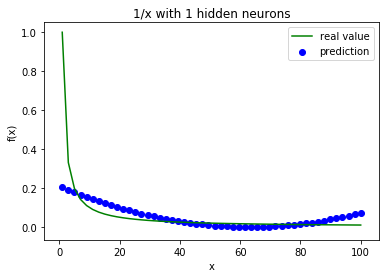

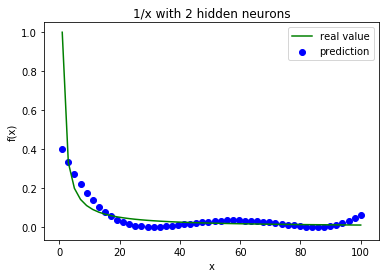

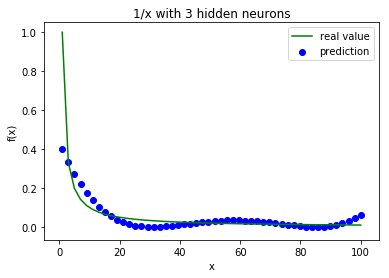

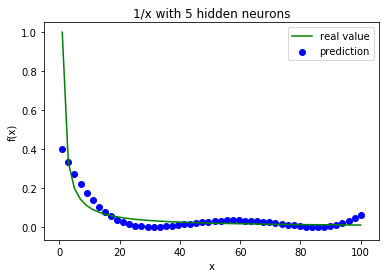

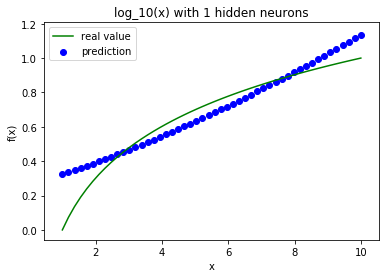

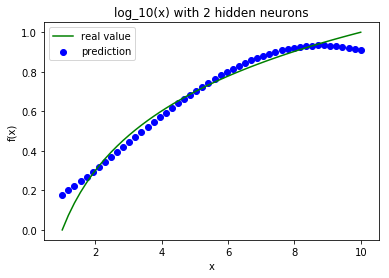

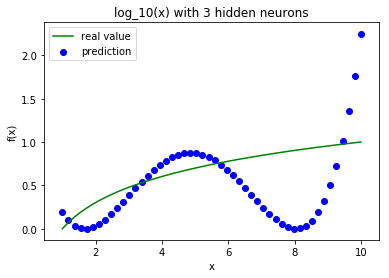

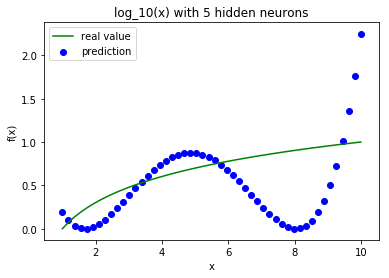

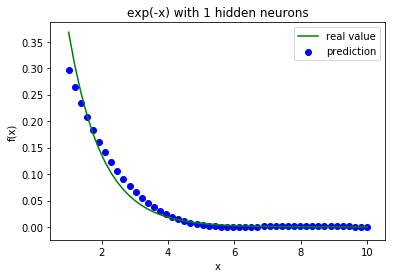

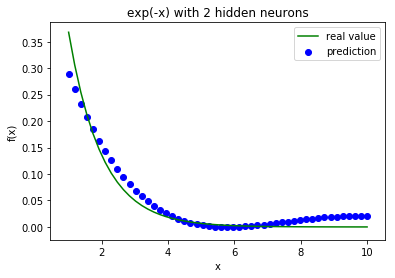

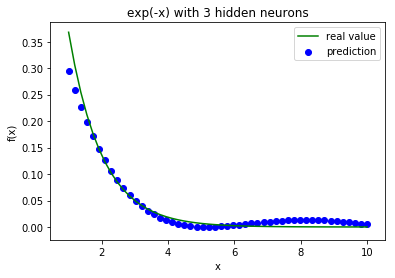

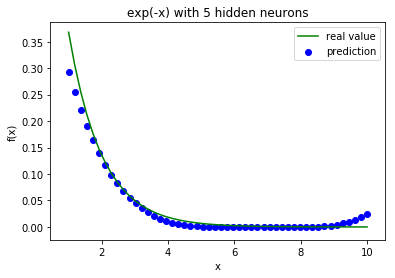

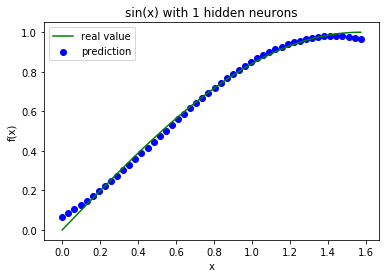

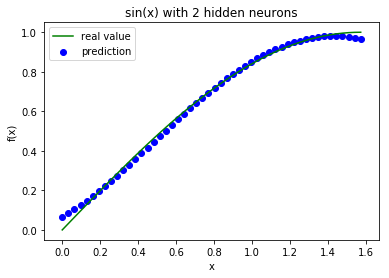

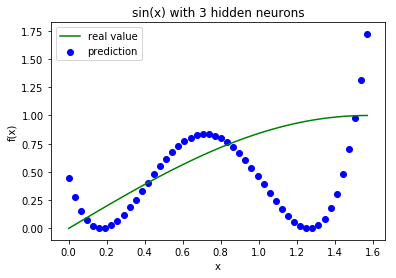

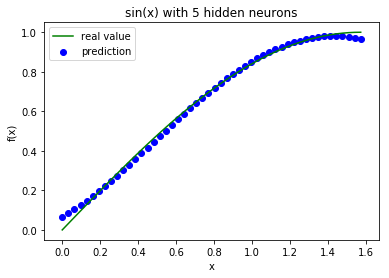

In [120]:
training_size = 100
test_size = 50
hidden_neurons = [1, 2, 3, 5]

mappings = []
mappings.append(mapping(func1, [1,100], "1/x"))
mappings.append(mapping(func2, [1,10], "log_10(x)"))
mappings.append(mapping(func3, [1,10], "exp(-x)"))
mappings.append(mapping(func4, [0, np.pi / 2], "sin(x)"))

for m in mappings:
    training_set = m.generate_set(training_size)
    input = training_set[:,0].reshape(training_size, 1)
    target = training_set[:,1].reshape(training_size, 1)
    
    errors = np.zeros((len(hidden_neurons), 1))
    
    for num_hidden_neurons in hidden_neurons:
        net = nl.net.newff([m.range_], [num_hidden_neurons,1], transf=[RadBasis(np.mean(input)), RadBasis(np.mean(input))])
        net.train(input, target, epochs=training_size, show=0)
        predictions = []
        space = np.linspace(m.range_[0], m.range_[1], test_size)
        for x in space:
            predictions.append(net.sim(np.array([[x]])))

        plt.figure()
        plt.plot(space, m.function(space), c="g")
        plt.scatter(space, np.array(predictions), c="b")
        plt.title(m.str + " with " + str(num_hidden_neurons) + " hidden neurons")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend(["real value", "prediction"])